In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import matplotlib.image as mpimg
from collections import Counter


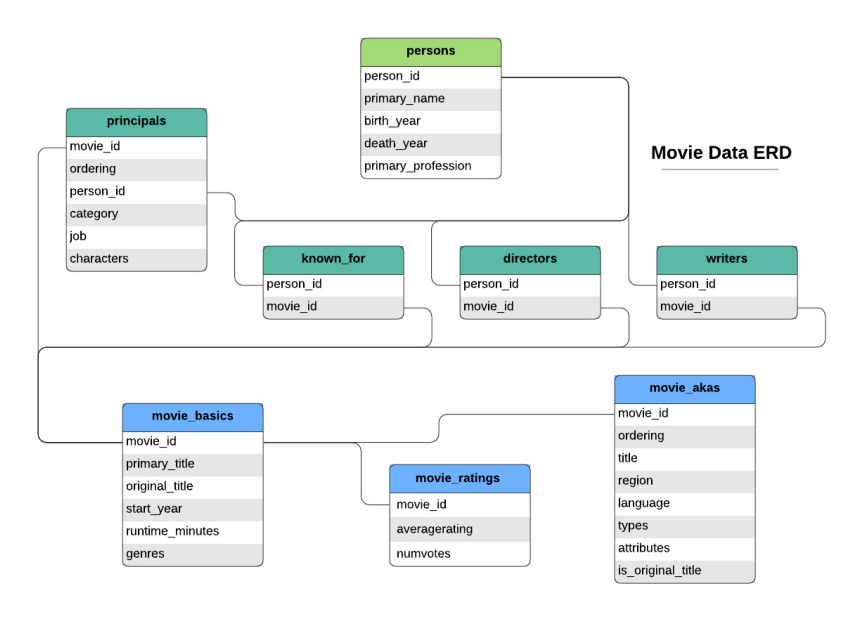

In [206]:
img = mpimg.imread('movie_data_erd.jpeg')
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [207]:
conn = sqlite3.connect("im.db")

cur = conn.cursor()

movie_gross = pd.read_csv("bom.movie_gross.csv.gz")

movie_budget = pd.read_csv("tn.movie_budgets.csv.gz")

reviews = pd.read_csv("rt.reviews.tsv.gz", sep='\t', encoding='ISO-8859-1')

movie_info = pd.read_csv("rt.movie_info.tsv.gz", sep='\t', encoding='ISO-8859-1')

pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table';""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


#### Check Missing Values in Movie Info Dataset

In [208]:
movie_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [209]:
# Read the TSV file
movie_info = pd.read_csv("rt.movie_info.tsv.gz", sep='\t', encoding='ISO-8859-1')

# Get missing values count and percentage

missing_values = movie_info.isnull().sum()

missing_percentage = (movie_info.isnull().sum() / len(movie_info)) * 100

# Create a summary dataframe

missing_summary_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage})

# Sort by percentage missing
missing_summary = missing_summary_df.sort_values('Percentage Missing', ascending=False);

missing_summary



,Missing Values,Percentage Missing
currency,1220,78.205128
box_office,1220,78.205128
studio,1066,68.333333
writer,449,28.782051
theater_date,359,23.012821
dvd_date,359,23.012821
director,199,12.756410
synopsis,62,3.974359
runtime,30,1.923077
genre,8,0.512821


In [210]:
movie_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [211]:
movie_info.shape

(1560, 12)

In [212]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


#### Cleaning the Dataset

In [213]:
# Drop columns with more than 50% missing values

cols_to_drop = missing_summary[missing_summary['Percentage Missing'] > 50].index

# Drop these columns
df_cleaned = movie_info.drop(columns=cols_to_drop)

#Fill categorical columns with mode
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Check if there are any remaining missing values
remaining_missing = df_cleaned.isnull().sum().sum()

print("\
Remaining Missing Values:", remaining_missing)

Remaining Missing Values: 0


In [214]:
df_cleaned.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64

In [215]:
#Check individual columns for any missing values
df_cleaned.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64

In [216]:
#Check the first five rows of the cleaned dataset
df_cleaned.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,A group of air crash survivors are stranded in...,NR,Drama|Romance,Rodney Bennett,Giles Cooper,"Jan 1, 1987","Jun 1, 2004",200 minutes


In [217]:
# split the genre column into a list of genres
df_cleaned['genre_list'] = df_cleaned['genre'].str.split('|')

# Explode to create a new row for each genre
df_cleaned_exploded = df_cleaned.explode('genre_list')

# Display the first few rows
df_cleaned_exploded.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,genre_list
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Science Fiction and Fantasy


In [218]:
# Remove the genre_column
df_cleaned_exploded = df_cleaned_exploded.drop('genre', axis=1)

In [219]:
# Rename the genre_list column to genre
updated_df = df_cleaned_exploded.rename(columns={'genre_list': 'genre'})

updated_df.head(3)

,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama


In [220]:
# Extract numeric values from the 'runtime' column
updated_df['runtime'] = updated_df['runtime'].str.extract('(\d+)').astype(float)

updated_df.head(2)

,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Classics


#### Checking the cleaned DataFrame Data Types

In [221]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3581 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3581 non-null   int64  
 1   synopsis      3581 non-null   object 
 2   rating        3581 non-null   object 
 3   director      3581 non-null   object 
 4   writer        3581 non-null   object 
 5   theater_date  3581 non-null   object 
 6   dvd_date      3581 non-null   object 
 7   runtime       3581 non-null   float64
 8   genre         3581 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 279.8+ KB


In [222]:
#Convert the dates to Date Time format
updated_df['theater_date'] = pd.to_datetime(df_cleaned_exploded['theater_date'])

updated_df['dvd_date'] = pd.to_datetime(df_cleaned_exploded['dvd_date'])


In [223]:
#Confirming the format has been updated

updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3581 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            3581 non-null   int64         
 1   synopsis      3581 non-null   object        
 2   rating        3581 non-null   object        
 3   director      3581 non-null   object        
 4   writer        3581 non-null   object        
 5   theater_date  3581 non-null   datetime64[ns]
 6   dvd_date      3581 non-null   datetime64[ns]
 7   runtime       3581 non-null   float64       
 8   genre         3581 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 279.8+ KB


#### Check Missing Values in Movie Budget Dataset 

In [224]:
# Get missing values count and pct

missing_values_budgets = movie_budget.isnull().sum()

missing_percentage_budgets = (movie_budget.isnull().sum() / len(movie_budget)) * 100

# Combine into a summary dataframe
missing_summary_budgets = pd.DataFrame({
    'Missing Values': missing_values_budgets,
    'Percentage Missing': missing_percentage_budgets})

missing_summary_budgets

,Missing Values,Percentage Missing
id,0,0.0
release_date,0,0.0
movie,0,0.0
production_budget,0,0.0
domestic_gross,0,0.0
worldwide_gross,0,0.0


#### The Movie Budget dataset has no missing values

In [225]:
#Checking the first 5 rows
movie_budget.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [226]:
#Remove the dollar sign from the numerical columns
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:

    movie_budget[col] = movie_budget[col].replace({'\\$': '', ',': ''}, regex=True).astype(float)

# Display the cleaned data types and head of the dataframe to confirm changes

print(movie_budget[['production_budget', 'domestic_gross', 'worldwide_gross']].head())

   production_budget  domestic_gross  worldwide_gross
0        425000000.0     760507625.0     2.776345e+09
1        410600000.0     241063875.0     1.045664e+09
2        350000000.0      42762350.0     1.497624e+08
3        330600000.0     459005868.0     1.403014e+09
4        317000000.0     620181382.0     1.316722e+09


In [227]:
#Check first five rows of movie_budget
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [228]:
# checking the data types of movie_budget
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [229]:
#Convert the release date to DateTime Format
movie_budget["release_date"] = pd.to_datetime(movie_budget['release_date'])

movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


##### The movie_budget Dataset is now clean and ready for EDA

### Checking Missing Values in the Movie Gross Dataset

In [230]:
# Load the dataset
movie_gross = pd.read_csv("bom.movie_gross.csv.gz")

# Check missing values
missing_values = movie_gross.isnull().sum()

missing_percentage = (movie_gross.isnull().sum() / len(movie_gross)) * 100

# Create a summary dataframe
missing_summary_gross = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage})


missing_summary_gross

,Missing Values,Percentage Missing
title,0,0.000000
studio,5,0.147623
domestic_gross,28,0.826690
foreign_gross,1350,39.858282
year,0,0.000000


The dataset has missing values primarily in the foreign_gross column, with a smaller number in domestic_gross and studio

### Cleaning the dataset
To clean the data, I'll remove rows with missing values in the studio and domestic_gross columns due to their small number, and consider imputing or removing rows with missing foreign_gross values based on their impact on analysis. 

In [231]:
# Remove rows with missing values in 'studio' and 'domestic_gross' columns
cleaned_movie_gross = movie_gross.dropna(subset=['studio', 'domestic_gross'])

# Making a copy of the DataFrame
cleaned_movie_gross = movie_gross.dropna(subset=['studio', 'domestic_gross']).copy()

# Fill Missing Values in 'foreign_gross' with 0
cleaned_movie_gross['foreign_gross'] = cleaned_movie_gross['foreign_gross'].fillna(0)

#Checking if there are any Missing Values
cleaned_movie_gross.isna().sum()


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [232]:
#Checking the Data Types of the Movie Gross Dataset
cleaned_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [233]:
#Convert the data type of foreign gross to numeric

cleaned_movie_gross['foreign_gross'] = cleaned_movie_gross['foreign_gross'].replace(',', '', regex=True).astype(float)

#Confirming the changes
cleaned_movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


### The three Datasets namely Movie Gross, Movie Budget and Movie Info are now clean and ready for EDA

In [234]:
#Merging Movie_info Dataset with Movie_budget Dataset
merged_df = pd.merge(updated_df, movie_budget, on='id', how='inner')

#check for any missing values in merged_df
merged_df.isna().sum()

id                   0
synopsis             0
rating               0
director             0
writer               0
theater_date         0
dvd_date             0
runtime              0
genre                0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [235]:
#cleaned_movie_gross.to_csv("movie_gross_csv_cleaned", index = True)
#updated_df.to_csv("movie_info_cleaned", index = True)
#merged_df.to_csv("merged_df_cleaned", index = False)


In [236]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111 entries, 0 to 10110
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 10111 non-null  int64         
 1   synopsis           10111 non-null  object        
 2   rating             10111 non-null  object        
 3   director           10111 non-null  object        
 4   writer             10111 non-null  object        
 5   theater_date       10111 non-null  datetime64[ns]
 6   dvd_date           10111 non-null  datetime64[ns]
 7   runtime            10111 non-null  float64       
 8   genre              10111 non-null  object        
 9   release_date       10111 non-null  datetime64[ns]
 10  movie              10111 non-null  object        
 11  production_budget  10111 non-null  float64       
 12  domestic_gross     10111 non-null  float64       
 13  worldwide_gross    10111 non-null  float64       
dtypes: dat

In [237]:
#merged = pd.read_csv("merged_df_cleaned")
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111 entries, 0 to 10110
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 10111 non-null  int64         
 1   synopsis           10111 non-null  object        
 2   rating             10111 non-null  object        
 3   director           10111 non-null  object        
 4   writer             10111 non-null  object        
 5   theater_date       10111 non-null  datetime64[ns]
 6   dvd_date           10111 non-null  datetime64[ns]
 7   runtime            10111 non-null  float64       
 8   genre              10111 non-null  object        
 9   release_date       10111 non-null  object        
 10  movie              10111 non-null  object        
 11  production_budget  10111 non-null  float64       
 12  domestic_gross     10111 non-null  float64       
 13  worldwide_gross    10111 non-null  float64       
dtypes: dat

In [238]:
#merged = pd.read_csv('merged_df_cleaned', parse_dates=["theater_date", "dvd_date"])


In [239]:
pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table';""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [240]:
#Extract the column names for the movie_basics table
cur.execute("SELECT * FROM movie_basics")

columns = [description[0] for description in cur.description]

# Print column names
print("Column names:", columns)

# Fetch all data if needed
data = cur.fetchall()

Column names: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']


In [241]:
#Extract the column names for the movie_ratings table
cur.execute("SELECT * FROM movie_ratings")

cols = [description[0] for description in cur.description]

# Print column names
print("Column names:", cols)

# Fetch all data if needed
data1 = cur.fetchall()

Column names: ['movie_id', 'averagerating', 'numvotes']


##### Join the Movie_basics table and the Movie_ratings table using Movie id which is the primary key

In [242]:
query = ("""SELECT *
         FROM movie_basics AS MB
         JOIN movie_ratings AS MR
         ON MB.movie_id = MR.movie_id
         """)
#Convert to a Dataframe
movie_df = pd.read_sql(query, conn)
movie_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


##### Check Missing Values for the joined tables

In [243]:
#check for the shape of the data
movie_df.shape

(73856, 9)

In [244]:
#check for data the statistics of numerical columns
movie_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [245]:
#check for missing values
movie_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
movie_id              0
averagerating         0
numvotes              0
dtype: int64

In [246]:
# Get missing values count and percentage
missing_count = movie_df.isnull().sum()

missing_pct = (movie_df.isnull().sum() / len(movie_df)) * 100

# Create a summary dataframe

missing_data = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage Missing': missing_pct})

# Sort by percentage missing
missing_summary_df2 = missing_data.sort_values('Percentage Missing', ascending=False);

missing_summary_df2


,Missing Values,Percentage Missing
runtime_minutes,7620,10.317374
genres,804,1.088605
movie_id,0,0.000000
primary_title,0,0.000000
original_title,0,0.000000
start_year,0,0.000000
movie_id,0,0.000000
averagerating,0,0.000000
numvotes,0,0.000000


 Only runtime column and genres have missing values which are small compared to the length of the dataset. The rows with the missing data fro runtime minutes and genres shall be removed so as to have a clean dataset

In [247]:
# Identify rows to remove
rows_to_remove = ["runtime_minutes", "genres"]

# Remove rows with NaN values in specified columns
movie_df.dropna(subset=rows_to_remove, inplace=True)

# Check for remaining NaN counts in the DataFrame
print(movie_df.isna().sum())

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
movie_id           0
averagerating      0
numvotes           0
dtype: int64


In [249]:
movie_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes'],
      dtype='object')

Movie_id column is duplicated. Need to remove it

In [252]:
# Remove columns with duplicate names
movie_df = movie_df.loc[:, ~movie_df.columns.duplicated()]
movie_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [251]:
#check for the data types
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB
